In [2]:
import argparse
import logging
import math
import os
import random
from pathlib import Path

import accelerate
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import ProjectConfiguration, set_seed
from datasets import load_dataset
from huggingface_hub import create_repo, upload_folder
from packaging import version
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import AutoTokenizer, PretrainedConfig

import diffusers
from diffusers import (
    AutoencoderKL,
    ControlNetModel,
    DDPMScheduler,
    StableDiffusionControlNetPipeline,
    UNet2DConditionModel,
    UniPCMultistepScheduler,
)
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version, is_wandb_available
from diffusers.utils.import_utils import is_xformers_available


import wandb

# Will error if the minimal version of diffusers is not installed. Remove at your own risks.
# check_min_version("0.18.0.dev0")

logger = get_logger(__name__)
from transformers import CLIPTextModel

import argparse
import logging
import math
import os
import random
from pathlib import Path

import accelerate
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import ProjectConfiguration, set_seed
from datasets import load_dataset
from huggingface_hub import create_repo, upload_folder
from packaging import version
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import AutoTokenizer, PretrainedConfig

import diffusers
from diffusers import (
    AutoencoderKL,
    ControlNetModel,
    DDPMScheduler,
    StableDiffusionControlNetPipeline,
    UNet2DConditionModel,
    UniPCMultistepScheduler,
)
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version, is_wandb_available
from diffusers.utils.import_utils import is_xformers_available

from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler, DPMSolverMultistepScheduler
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from PIL import Image
from torchvision import transforms
import torch.nn.functional as F
import numpy as np 
import cv2
from diffusers import (
    AutoencoderKL,
    ControlNetModel,
    DDPMScheduler,
    StableDiffusionControlNetPipeline,
    UNet2DConditionModel,
    UniPCMultistepScheduler,
)
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import ProjectConfiguration, set_seed
# import bitsandbytes as bnb
from diffusers.optimization import get_scheduler



In [30]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

# noise_scheduler = DDPMScheduler.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="scheduler")
# tokenizer = CLIPTokenizer.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="tokenizer")
# text_encoder = CLIPTextModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="text_encoder")
# vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae" )
# unet = UNet2DConditionModel.from_pretrained(
#         "runwayml/stable-diffusion-v1-5", subfolder="unet"
#     )
base_model_path = "runwayml/stable-diffusion-v1-5"
# "./model_out/checkpoint-10000/optimizer.bin"
# config.json diffusion_pytorch_model.bin
# "./model_out/checkpoint-10000/controlnet/diffusion_pytorch_model.bin"
controlnet_model_path = "./model_out/checkpoint-10000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
# pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()
pipe.safety_checker = None
# pipe.to(accelerator.device)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


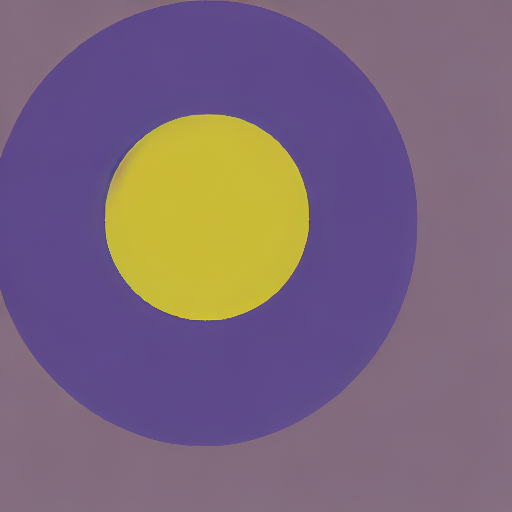

In [19]:

control_image = load_image("conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


image.save(".output.png")
image

100%|██████████| 10/10 [00:02<00:00,  4.71it/s]


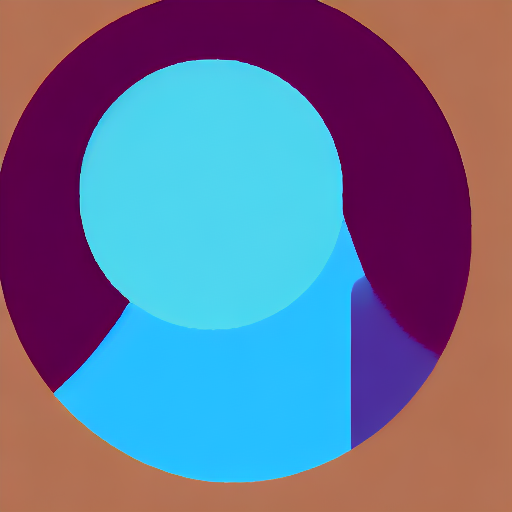

In [21]:

control_image = load_image("conditioning_image_2.png")
prompt = "cyan circle with brown floral background"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=10, generator=generator, image=control_image
).images[0]


image.save(".output_2.png")
image

100%|██████████| 20/20 [00:03<00:00,  5.65it/s]


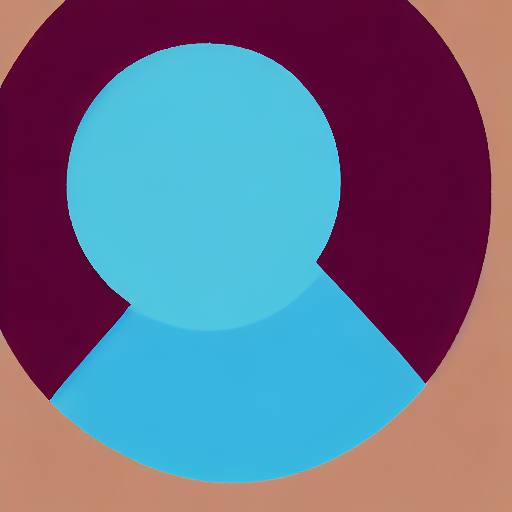

In [31]:

control_image = load_image("conditioning_image_2.png")
prompt = "cyan circle with brown floral background"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 20/20 [00:03<00:00,  5.69it/s]


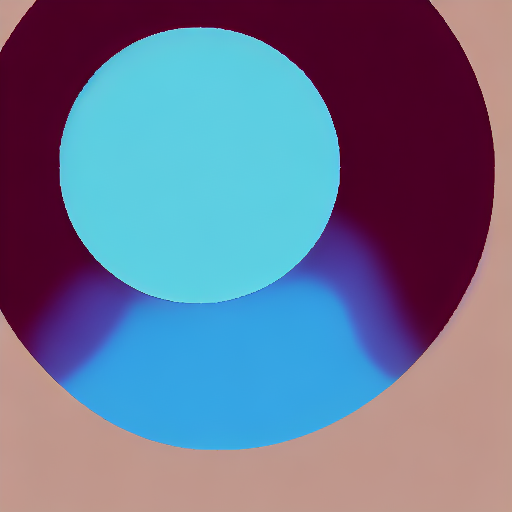

In [32]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "./model_out/checkpoint-12500/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("conditioning_image_2.png")
prompt = "cyan circle with brown floral background"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


In [1]:
import os
os.getcwd()

'/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet'

In [ ]:
Capstonediffusersexamplescontrolnetcontrolnet-model

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

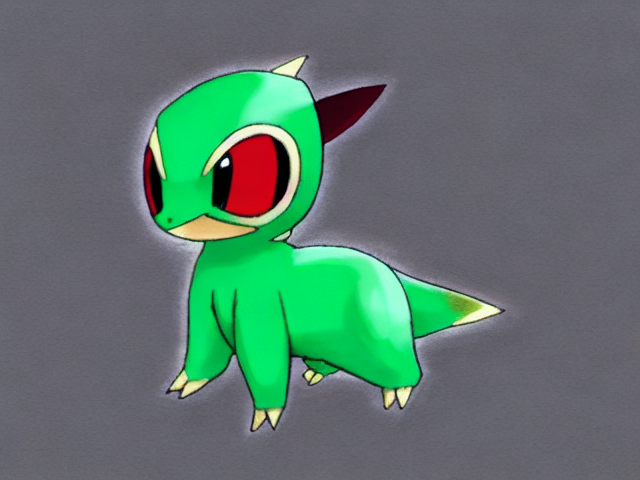

In [3]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-5000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/source.png")
prompt = "a drawing of a green pokemon with red eyes"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

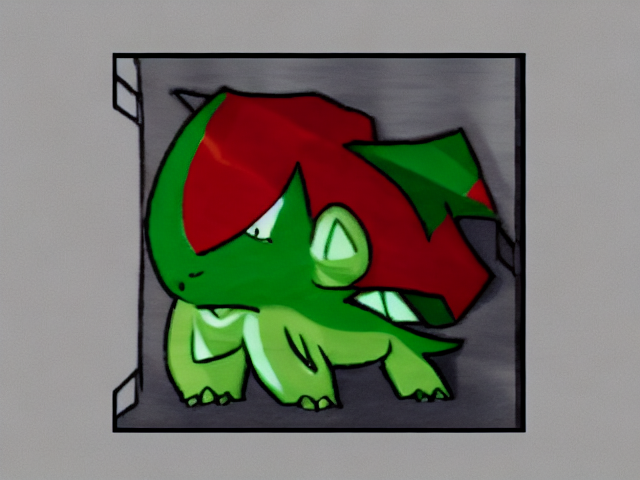

In [4]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-10000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/source.png")
prompt = "a drawing of a green pokemon with red eyes"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

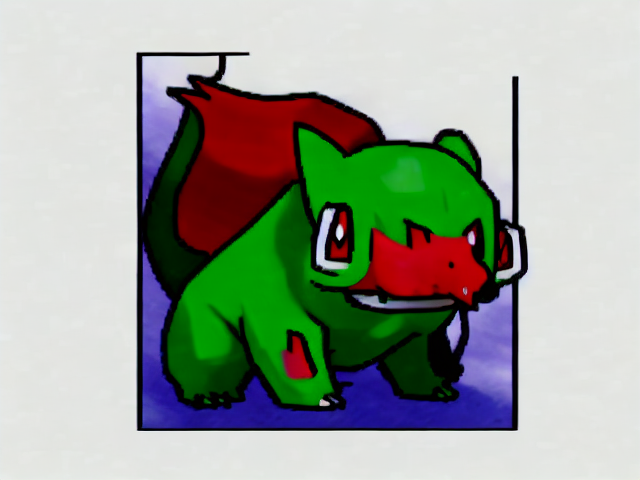

In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-15000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/source.png")
prompt = "a drawing of a green pokemon with red eyes"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

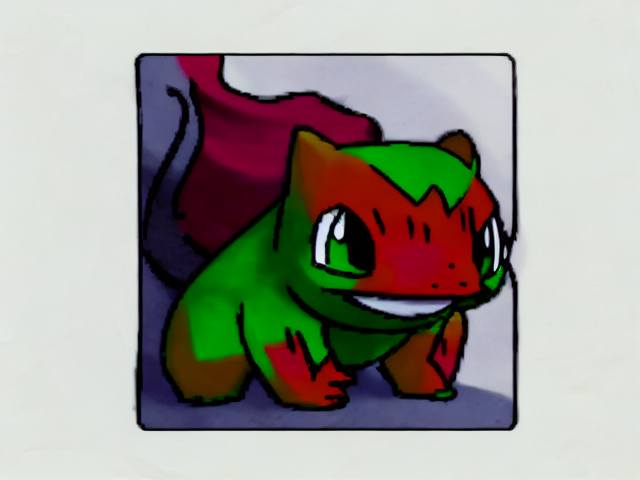

In [6]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-20500/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/source.png")
prompt = "a drawing of a green pokemon with red eyes"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

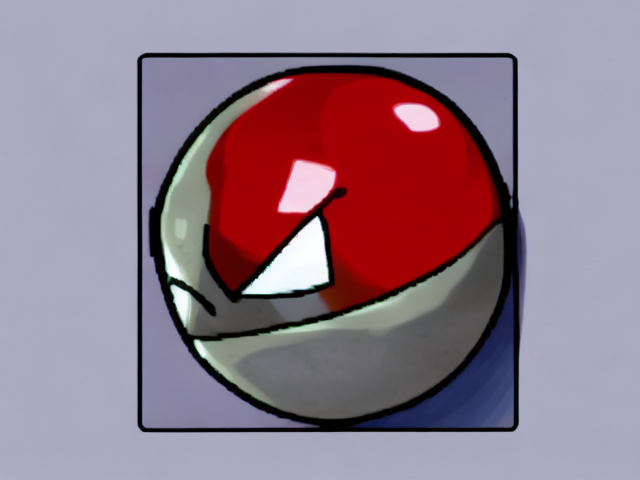

In [7]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-20500/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/pokemon_conditioning_image_2.png")
prompt = "a red and a white ball with angry look on it's face"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

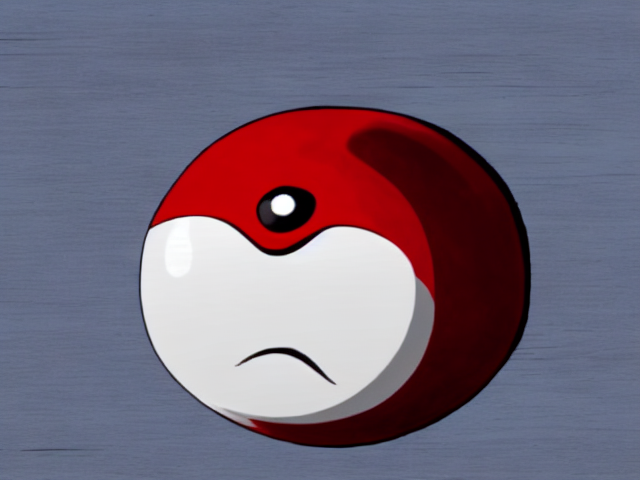

In [8]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-5000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/pokemon_conditioning_image_2.png")
prompt = "a red and a white ball with angry look on it's face"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

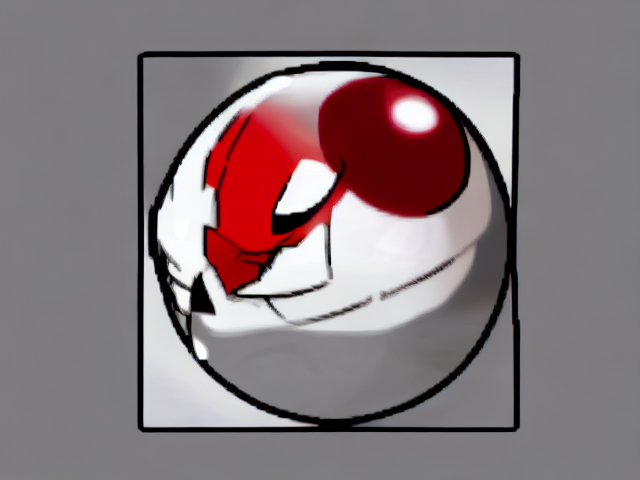

In [9]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-10000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/pokemon_conditioning_image_2.png")
prompt = "a red and a white ball with angry look on it's face"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

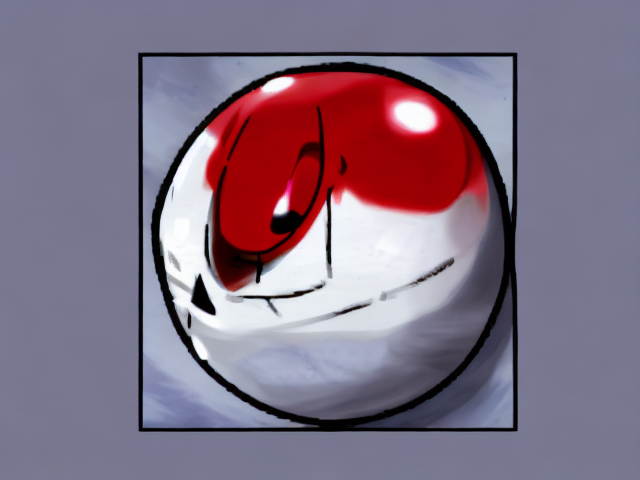

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_model_path = "/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/Capstone/diffusers/examples/controlnet/controlnet-model/checkpoint-15000/controlnet"
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16, requires_safety_checker=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.safety_checker = None


control_image = load_image("/mnt/cephfs/hadoop-compute/phoenix/sfarhan/Explore/Deep Learning/pokemon_conditioning_image_2.png")
prompt = "a red and a white ball with angry look on it's face"

# generate image
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]


# image.save(".output_2.png")
image


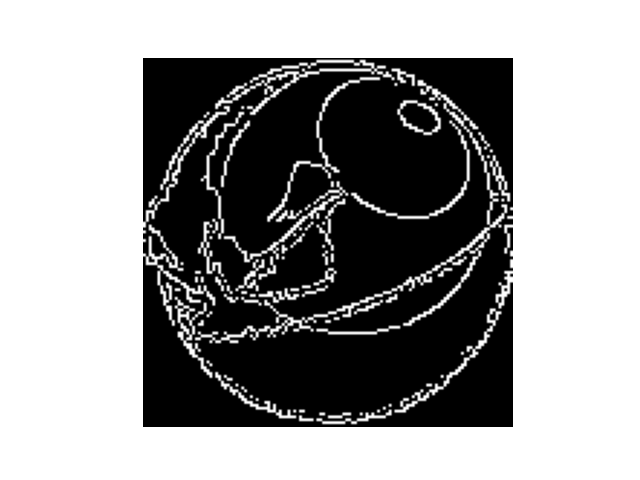

In [11]:
control_image